In [2]:
import pyoti.real   as r
import pyoti.sparse as oti 
import pyoti.core   as coti

np = oti.np

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc

## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':16})
rc('text', usetex=True)

from matplotlib.ticker import MultipleLocator
# rc('font',**{'family':'serif','serif':['Palatino'], 'size':12})

In [3]:
# coti.print_capabilities()
h=coti.get_dHelp()
h.get_ndir_total(2,30)

496

In [4]:
def f_tri(x,y,z, alg = oti):
    return alg.sin(alg.log(x**2*alg.exp(y*z**2))*alg.cos(x**3*y**2*z**4))

def f_bi(x,y, alg = oti):
    return alg.sin(alg.log(x**2*alg.exp(y))*alg.cos(x**3*y**2))


In [5]:
x = 0.5+oti.e(1,order=50)
y = 0.8+oti.e(2,order=50)

In [6]:
%timeit f = f_bi(x,y,alg=oti)
f = f_bi(x,y,alg=oti)

22.6 ms ± 41.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
f.get_deriv([[1,25],[2,25]])

2.186426930032563e+68

In [3]:
def thesis_funct_pya(x):
    prod_10 = 1
    prod_1  = 1
    for i in range(len(x)):
        prod_10 = prod_10 * x[i]**10
        prod_1  = prod_1 * x[i]
    # end for
    f = pya.sin(prod_10)*pya.cos(prod_1)/prod_1
    return f

def thesis_funct_oti(x):
    prod_10 = 1
    prod_1  = 1
    for i in range(len(x)):
        prod_10 = prod_10 * x[i]**10
        prod_1  = prod_1 * x[i]
    # end for
    f = oti.sin(prod_10)*oti.cos(prod_1)/prod_1
    return f

def thesis_funct_oti_opt(x):
    prod_10 = oti.number(1,nbases=m, order=m)
    prod_1  = oti.number(1,nbases=m, order=m)
    tmp = oti.number(0,nbases=m, order=m)
    tmp2 = oti.number(0,nbases=m, order=m)
    tmp3 = oti.number(0,nbases=m, order=m)
    for i in range(len(x)):
        oti.pow(x[i],10,out=tmp)
        oti.mul(prod_10,tmp,out=prod_10)
        oti.mul(prod_1,x[i],out=prod_1)
    # end for
    oti.sin(prod_10,out=tmp)
    oti.cos(prod_1,out=tmp2)
    oti.mul(tmp,tmp2,out=tmp3)
    
    f = tmp3/prod_1
    
    return f

In [214]:
m = 20
n = 2
x_pyaudi = []
x_oti = []

for i in range(m):
    x_pyaudi.append(gd(1.5,"x"+str(i),n))
    x_oti.append(1.5+oti.e(i+1,order=n))

In [215]:
b = thesis_funct_oti(x_oti)

In [216]:
%timeit thesis_funct_oti(x_oti)

72.4 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [217]:
%timeit thesis_funct_pya(x_pyaudi)

7.63 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [205]:
(56+60)/4.57     # n4, m50    1min 57s / 4.57 s
(4.04*1000)/24.8 # n3, m50      4.04 s / 24.8 ms
(116*1000)/620   # n2, m50      116 ms / 631 µs
(5.98*1000)/47.6 # n1, m50     5.98 ms / 47.6 µs 


5.16*1000/226 # n4, m30     5.16 s / 226 ms
227/3.48      # n3, m30     227 ms /  3.48 ms
22.5*1000/168 # n2, m30    22.5 ms / 168 µs
1.89*1000/28.5# n1, m30    1.89 ms / 28.5 µs

385/23.2      # n4, m20  385 ms / 23.2 ms
50.8*1000/797 # n3, m20 50.8 ms /  797 µs
7.5*1000/70.7 # n2, m20  7.45 ms/70.7 µs
907/18.7      # n1, m20 907 µs/18.7 µs


21.4*1000/693   # n4, m10 21.4 ms/ 693 µs
6.02*1000/92.1  # n3, m10  6.02 ms / 92.1 µs
1.14*1000/23.4  # n2, m10 1.14 ms / 23.4 µs
297 / 10.4      # n1, m10 297 µs / 10.4 µs

1.38*1000/57 # n4, m5 1.38 ms/ 57 µs
579/23.3     # n3, m5  579 µs /23.3 µs
237/10.8 # n2, m5 237 µs / 10.8 µs
113/5.77 # n1, m5 113 µs / 5.77 µs

70.4/9.58 # n4, m1 70.4 µs   / 9.58 µs 
54.7/6.25# n3, m1 54.7 µs / 6.25 µs
45.1/4.04 # n2, m1   45.1 µs / 4.04 µs
30.4/2.57# n1, m1  30.4 µs / 2.57 µs



150/14.8# n4, m2 150 µs/14.8 µs
102 / 9.68 # n3, m2  102 µs / 9.68 µs
75.8 / 5.65 # n2, m2 75.8 µs / 5.65 µs
50.1 / 3.28# n1, m2 50.1 µs/ 3.28 µs

15.27439024390244

In [15]:
4.57*25


# %timeit thesis_funct_oti_opt(x_oti)




114.25

In [16]:
71.1/11.4

6.2368421052631575

In [7]:
788/213

3.699530516431925

In [14]:
89.2/4.66 #

738/33.6

21.96428571428571

In [35]:
x = 0.8 + oti.e(1,order = 50)
y = 0.8 + oti.e(2,order = 50)
z = 1.2 + oti.e(3,order = 50)

In [5]:
# %timeit f_eval = f_tri(x,y,z,alg=oti)

In [36]:
f_eval = f_bi(x,y,alg=oti)

In [49]:
%timeit f_eval = f_bi(x,y,alg=oti)
f_eval = f_bi(x,y,alg=oti)
f_eval_p = f_bi_p(x,y,alg=oti)

768 µs ± 4.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
order =50

In [19]:
f_eval.get_deriv([[1,2],[2,2]])

-7.105427357601002e-15

<IPython.core.display.Javascript object>


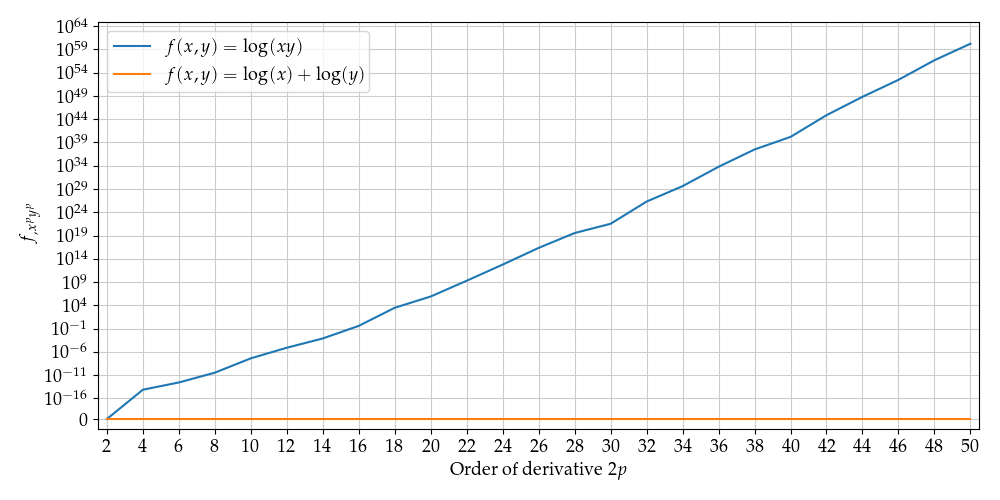

1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25


In [60]:
from matplotlib.ticker import MultipleLocator
rc('font',**{'family':'serif','serif':['Palatino'], 'size':13})
plt.figure(figsize=(10,5))
new_order = order
xvals  = np.arange(2,order+1,2)


yvals = np.zeros(xvals.size)
yvals_p = np.zeros(xvals.size)

for i in range(len(xvals)):
    ordi = int(xvals[i])
    px = ordi//2
    py = ordi-px
    print(px,py)
    yvals[i]=abs(f_eval.get_deriv([[1,px],[2,py]]))
    yvals_p[i]=abs(f_eval_p.get_deriv([[1,px],[2,py]]))

plt.semilogy(xvals,yvals,label='$f(x,y)=\log(xy)$')
plt.semilogy(xvals,yvals_p,label='$f(x,y)=\log(x)+\log(y)$')

ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(2))

ax.set_axisbelow(True)
plt.yscale('symlog',linthreshy=1e-16,linscaley=4)
# plt.rc('xtick',fontsize=14)
plt.grid(which='major',color='#CCCCCC')
plt.minorticks_on()
plt.grid(which='minor',color='#EEEEEE')
ax.xaxis.set_minor_locator(MultipleLocator(2))
plt.axis([1.5,xvals[-1]+0.5,-5e-17, 1e65])
plt.ylabel("$f_{,x^{p}y^{p}}$")
plt.xlabel("Order of derivative $2p$")
plt.legend()
plt.tight_layout()

plt.savefig("error_logxy_mixed_deriv.pdf",dpi=150)
plt.show()

In [33]:
f_eval = f_eval.truncate([1,2])

In [35]:
f_eval.get_deriv([[1,50]])

-6.848644940502393e+77

In [12]:
dx = 0.5
dy = 0.5
f_eval.taylor_integrate([1,2],[dx,dy]).real

nan

In [13]:
f_bi(x.real+dx,y.real+dy,alg=oti.np)

0.26236426446749106

In [14]:
y.real+dy

1.3

In [15]:
x.real+dx

1.0

In [16]:
f_eval.get_order_im(1)

0.0000 + 2.0000 * e([1]) + 1.2500 * e([2])

In [37]:
xsize = 1.5
ysize = 1.5
tx = np.linspace( -xsize*x.real,xsize*x.real, 200 )
ty = np.linspace( -ysize*y.real,ysize*y.real,  200 )

Tx, Ty = np.meshgrid(tx,ty)


orders_ti = np.array([30,20,10,5,2],dtype=np.uint8)
# orders_ti = np.array([5,],dtype=np.uint8)

error_ti = np.zeros((orders_ti.size,Tx.shape[0],Tx.shape[1]))

kk=0


for ordi in orders_ti:
    f_eval_int = oti.zero()
    for oo in range(0,ordi+1):
        
        f_eval_int += f_eval.get_order_im(oo)
        
    # end for 

    for ii in range(Tx.shape[0]):
        for jj in range(Tx.shape[1]):
            dx = Tx[ii,jj]
            dy = Ty[ii,jj]
            f_new = f_eval_int.rom_eval([1,2],[dx,dy]).real

            f_a = f_bi(x.rom_eval([1,2],[dx,dy]),y.rom_eval([1,2],[dx,dy])).real
            
            error_ti[kk,ii,jj]=abs( (f_new-f_a)/(f_a) )
        # end for 
    # end for 
    kk+=1
    
# error_ti

In [10]:

error_ti_trunc = np.zeros((orders_ti.size,Tx.shape[0],Tx.shape[1]))

kk=0
f_eval_trunc = f_eval.truncate([1,2])

for ordi in orders_ti:
    
    f_eval_int = oti.zero()
    
    for oo in range(0,ordi+1):
        
        f_eval_int += f_eval_trunc.get_order_im(oo)
        
    # end for 

    for ii in range(Tx.shape[0]):
        for jj in range(Tx.shape[1]):
            dx = Tx[ii,jj]
            dy = Ty[ii,jj]
            f_new = f_eval_int.taylor_integrate([1,2],[dx,dy]).real

            f_a = f_bi(x.taylor_integrate([1,2],[dx,dy]),y.taylor_integrate([1,2],[dx,dy])).real
            
            error_ti_trunc[kk,ii,jj]=abs( (f_new-f_a)/(f_a) )
        # end for 
    # end for 
    kk+=1
    
# error_ti_trunc

<IPython.core.display.Javascript object>


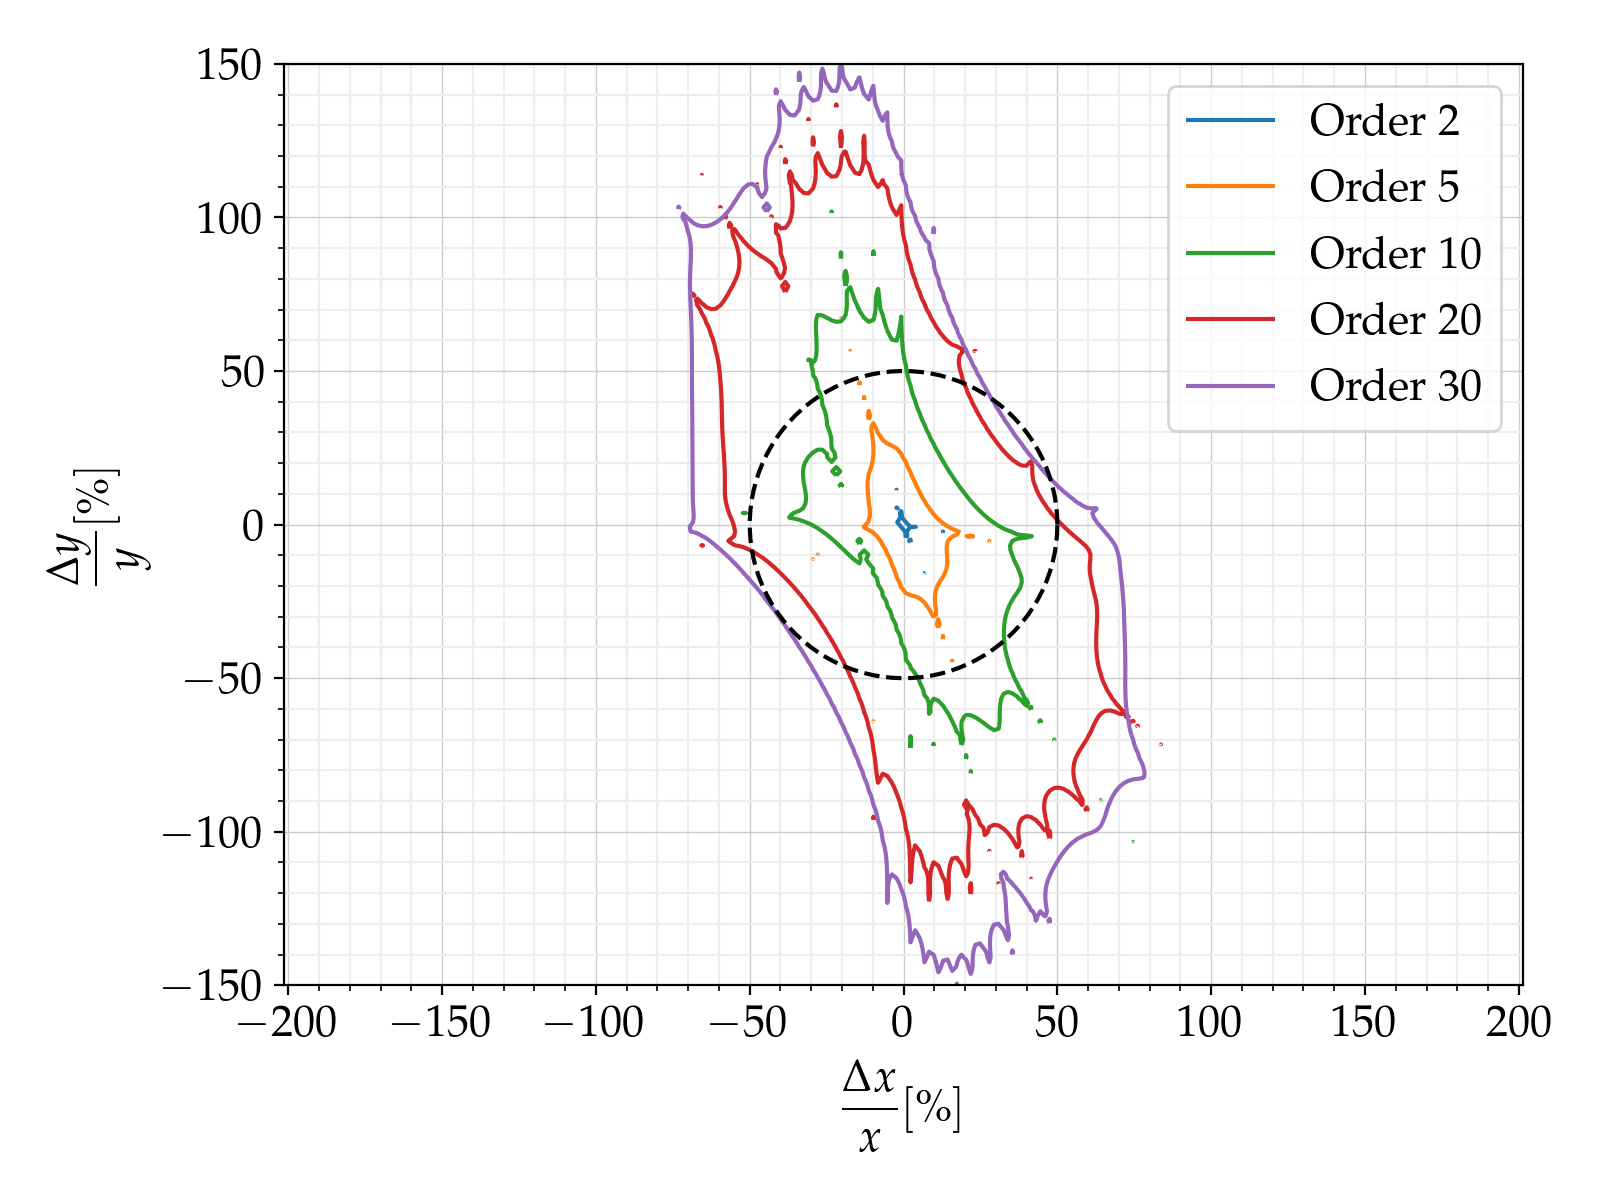

In [92]:
from matplotlib import ticker, cm, colors

rc('font',**{'family':'serif','serif':['Palatino'], 'size':16})
             
fig = plt.figure(figsize=(8,6))
lev_exp = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,14],dtype=np.float64)
levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

# cp = plt.contourf(100*Tr/ro.real,100*TE/E.real,error_ti[0], levels=16,locator=ticker.LogLocator(10),norm=colors.LogNorm(vmax = 1e1), cmap=cm.jet)
# cp = plt.contourf(100*Tr/ro.real,100*TE/E.real,error_ti[0], levs,antialiased=True, norm=colors.LogNorm(vmax = 1e1), cmap=cm.jet)
# cbar = fig.colorbar(cp)

for kk in range(len(orders_ti)):
    CS=plt.contour(100*Tx/x.real,100*Ty/y.real,error_ti[-1-kk], [1e-5], colors = 'C'+str(kk))
    
#     plt.clabel(CS,fmt='Order '+str(orders_ti[kk]), inline=1, fontsize=12, colors='k')
#     plt.clabel(CS,fmt='Ord. '+str(orders_ti[-1-kk]), inline=1, fontsize=8, colors='k')
    
    CS.collections[0].set_label('Order '+str(orders_ti[-1-kk]))

# cbar.ax.set_ylabel("Relative error of \n$\\left.\\mathbf{u}(r_o+\\Delta r_o, E+\\Delta E)\\right|_{r_i}$")
plt.xlabel("$\\displaystyle{\\frac{\Delta x}{x}} [ \% ]$")
plt.ylabel("$\\displaystyle{\\frac{\Delta y}{y}} [ \% ]$")

theta = np.linspace(0,2*np.pi,100)
r = 0.5*100
circx = r*np.cos(theta)
circy = r*np.sin(theta)

plt.plot(circx,circy,'k--')

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
plt.grid(which='major',color='#CCCCCC', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor',color='#EEEEEE')

dX = 60
plt.axis([-100-dX,160+dX,-100-dX,100+dX])
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.savefig('error_feval_orders.pdf',dpi=150)
plt.show()

In [58]:
orders_ti

array([30, 20, 10,  5,  2], dtype=uint8)

In [55]:
error_ti[-1-kk].flatten()

array([4.69015089e+13, 4.09954884e+13, 3.60954841e+13, ...,
       9.34821263e+13, 1.41586694e+14, 1.26486754e+14])

<IPython.core.display.Javascript object>


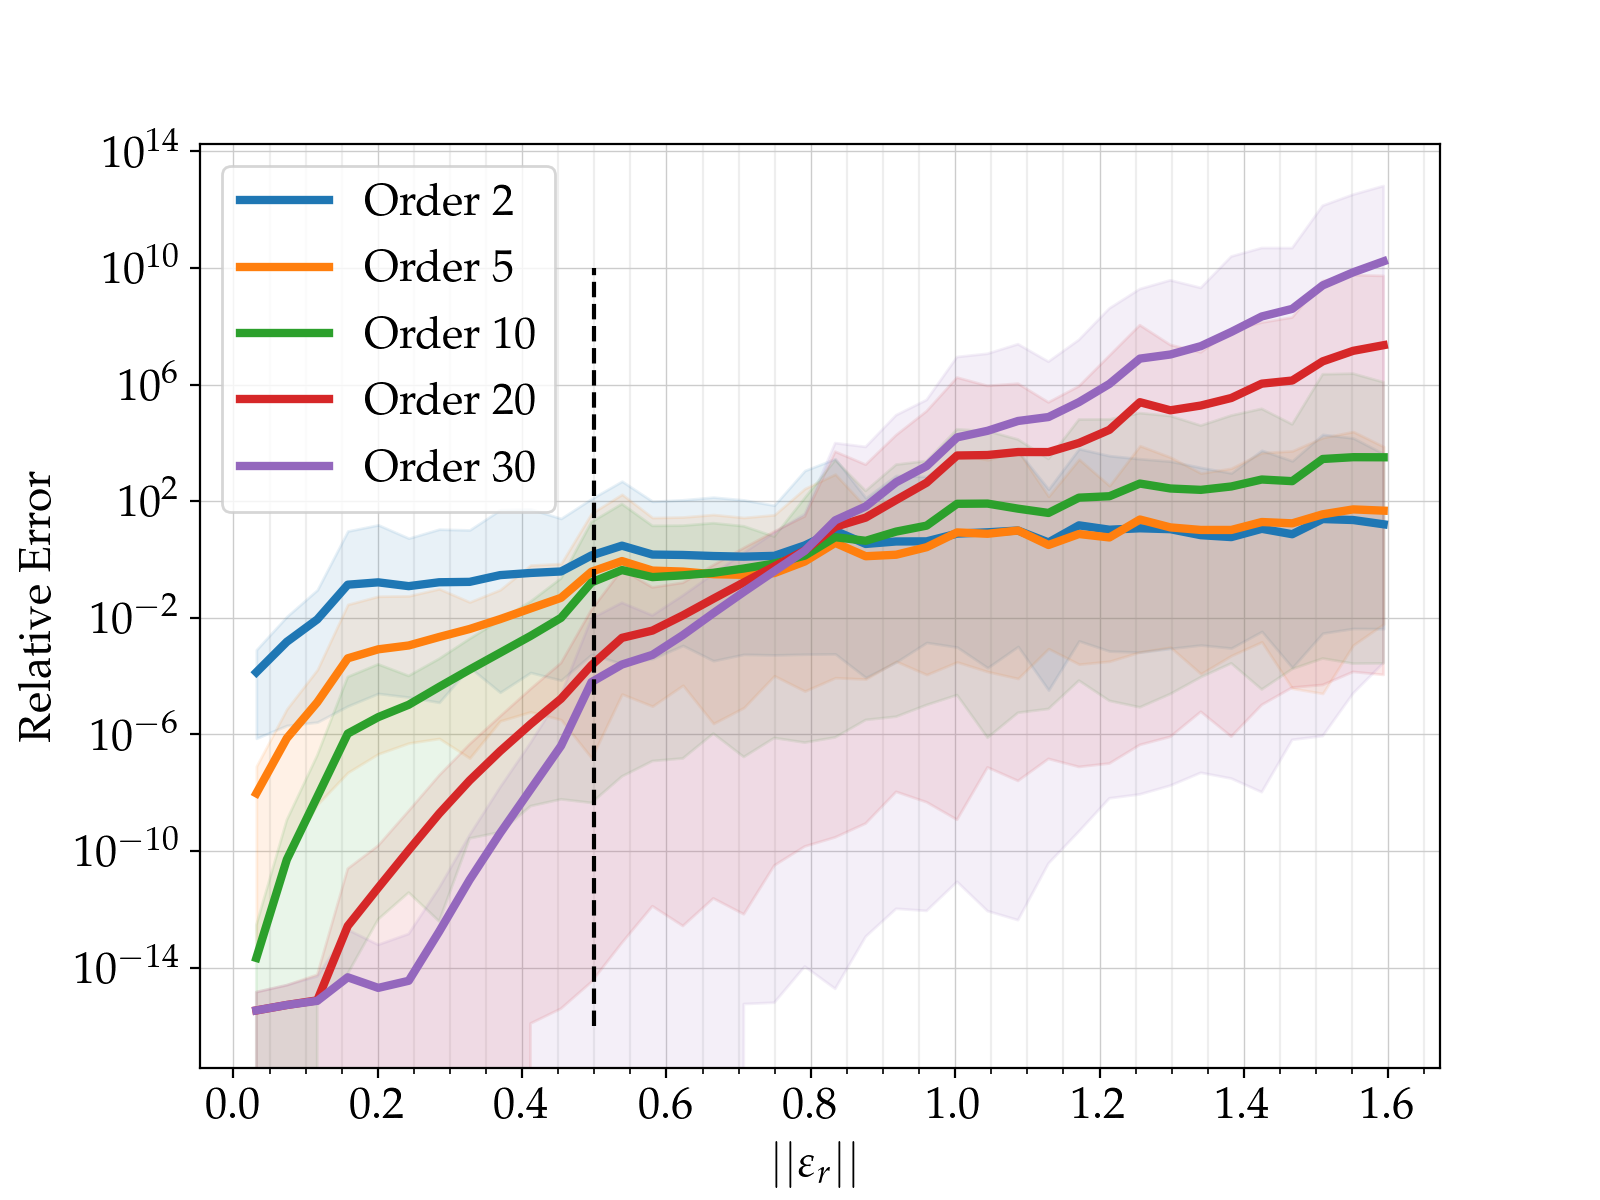

In [144]:
plt.figure(figsize=(8,6))
ε_vec_plot = np.sqrt((Tx/x.real)**2+(Ty/y.real)**2).flatten()
ε_max =max(ε_vec)
ε_min =min(ε_vec)
nBlocks= 50
dε=(ε_max-ε_min)/nBlocks
ε_plots = np.arange(ε_min,ε_max,dε)+dε/2

for kk in range(len(orders_ti)):
    ε_vec = np.sqrt((Tx/x.real)**2+(Ty/y.real)**2).flatten()
    error_plot = (error_ti[-1-kk]).flatten()

    error_mean = np.zeros_like(ε_plots)
    error_top = np.zeros_like(ε_plots)
    error_bottom = np.zeros_like(ε_plots)
    
    for i in range(nBlocks):
        εl = ε_min+i*dε
        εr = ε_min+(i+1)*dε
        
        indx = np.logical_and(ε_vec>=εl, ε_vec<=εr)
#         print(indx.shape)
        error_plot_i = error_plot[indx]
        mu = np.mean(error_plot_i)
        sigma = np.std(error_plot_i)
        error_mean[i] = mu
        error_top[i] = max(error_plot_i)#mu + 3*sigma
        error_bottom[i] = min(error_plot_i)#mu - 3*sigma
        
    error_plot = (error_ti[-1-kk]).flatten()
    indices = error_plot>1e-300
    ε_vec = ε_vec[indices]
    error_plot = error_plot[indices]
#     print(ε_vec.flatten())
    
#     plt.semilogy(ε_vec,error_plot,
#                  '.',
#                  markersize=0.2,
#                  color = 'C'+str(kk),
#                  label='Order '+str(orders_ti[-1-kk])
#                 )
    indxPlot = ε_plots<1.6
    plt.plot(ε_plots[indxPlot],error_mean[indxPlot],
                 '-',
                 lw=3,
                 color = 'C'+str(kk),
                 label='Order '+str(orders_ti[-1-kk])
                )
    plt.fill_between(ε_plots[indxPlot],error_bottom[indxPlot],error_top[indxPlot],
                 color = 'C'+str(kk),alpha=0.1
                )
plt.gca().set_yscale('log')
plt.gca().set_axisbelow(True)

plt.xlabel(r"$||\varepsilon_r||$")
plt.ylabel("Relative Error")
plt.plot(r/100*np.ones(2),[1e-16,1e10],'k--')
plt.grid(which='major',color='#CCCCCC', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor',color='#EEEEEE')

plt.legend(markerscale=10)
# plt.tight_layout()
plt.savefig('error_feval_orders.pdf',dpi=150)
plt.show()

<IPython.core.display.Javascript object>


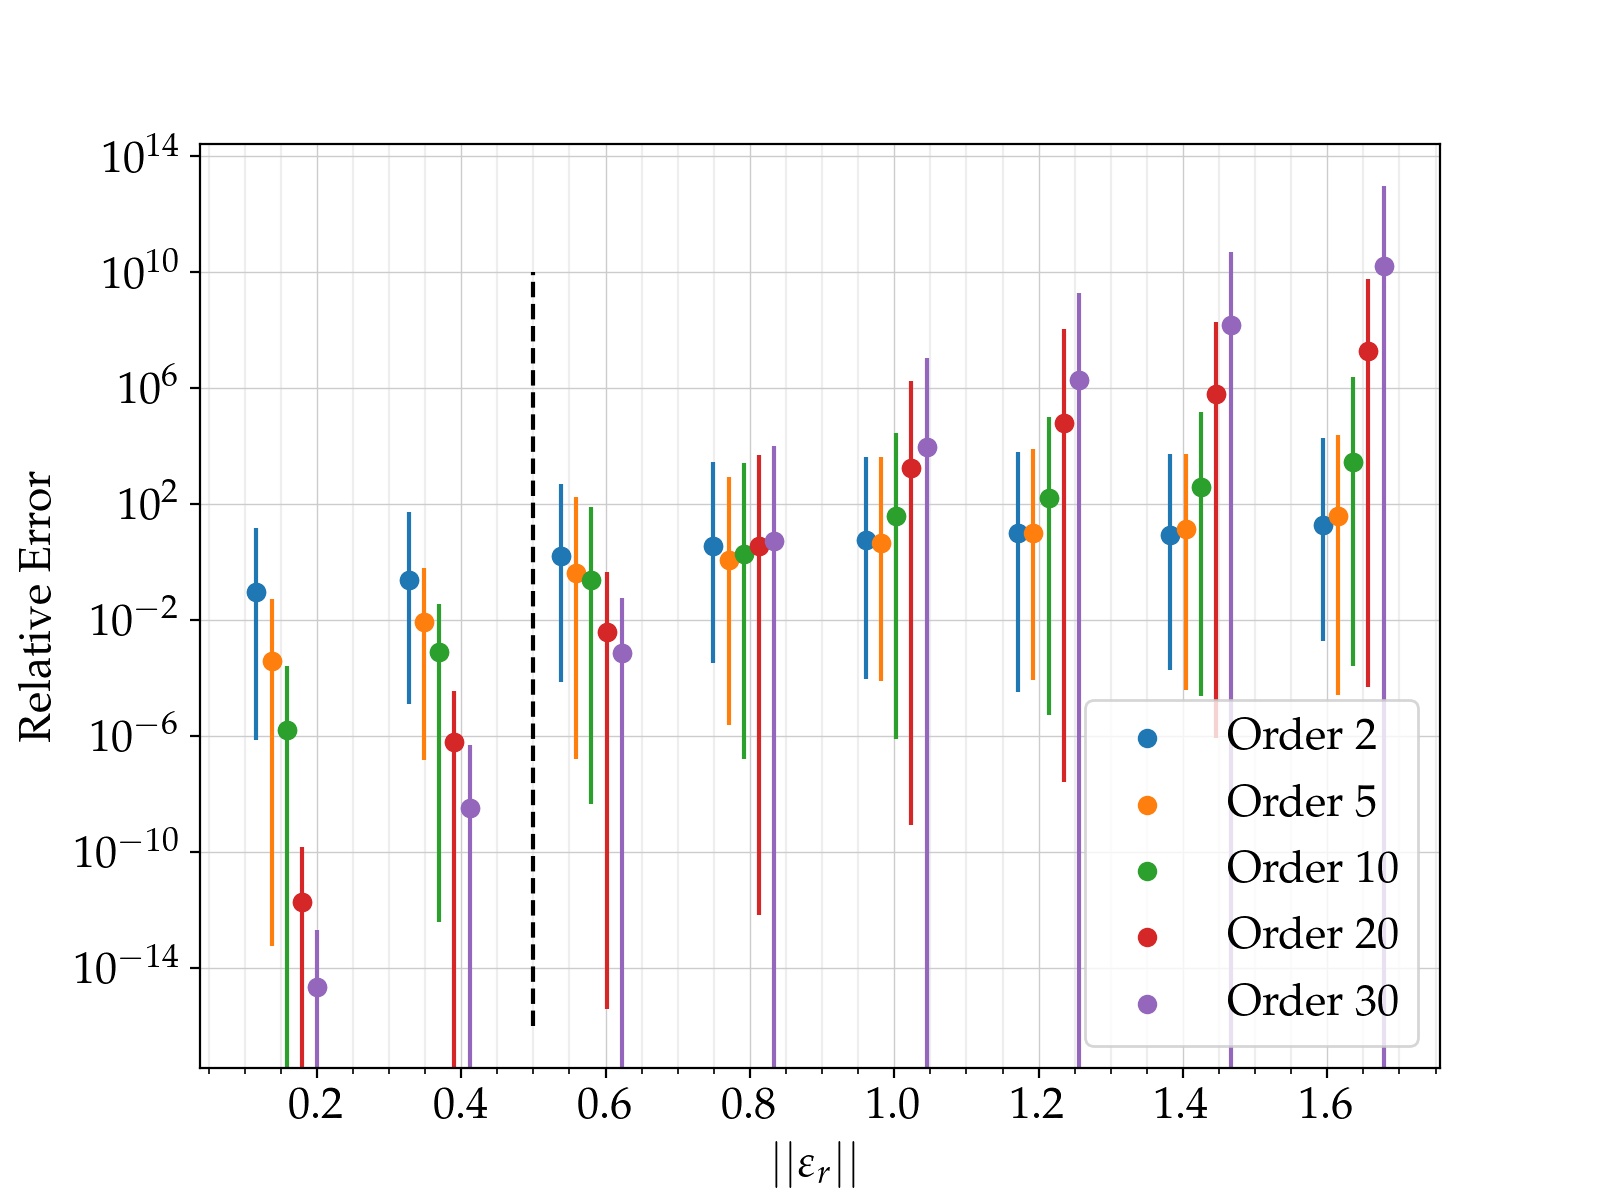

[ 0.09731919  0.23526924  1.58152237  3.54950248  5.77937072 10.28970439
  8.48798236 18.71560116]
[4.03108584e-04 8.70156737e-03 4.38880707e-01 1.19911364e+00
 4.51657837e+00 1.01736684e+01 1.41965331e+01 4.05791754e+01]
[1.64919448e-06 7.84969761e-04 2.40427300e-01 1.89955945e+00
 4.08166845e+01 1.61739765e+02 3.82784191e+02 2.95857440e+03]
[1.96518334e-12 6.29242034e-07 3.99333752e-03 3.56498742e+00
 1.73541236e+03 6.29597304e+04 6.51201448e+05 1.89147713e+07]
[2.24718159e-15 3.31336980e-09 7.55277629e-04 5.49646754e+00
 9.38931287e+03 1.96255723e+06 1.49157368e+08 1.65266149e+10]


In [143]:
plt.figure(figsize=(8,6))
ε_vec_plot = np.sqrt((Tx/x.real)**2+(Ty/y.real)**2).flatten()
ε_max =max(ε_vec)
ε_min =min(ε_vec)
nBlocks= 10
dε=(ε_max-ε_min)/nBlocks
ε_plots = np.arange(ε_min,ε_max,dε)+dε/2

for kk in range(len(orders_ti)):
    ε_vec = np.sqrt((Tx/x.real)**2+(Ty/y.real)**2).flatten()
    error_plot = (error_ti[-1-kk]).flatten()

    error_mean = np.zeros_like(ε_plots)
    error_top = np.zeros_like(ε_plots)
    error_bottom = np.zeros_like(ε_plots)
    
    for i in range(nBlocks):
        εl = ε_min+i*dε
        εr = ε_min+(i+1)*dε
        
        indx = np.logical_and(ε_vec>=εl, ε_vec<=εr)
#         print(indx.shape)
        error_plot_i = error_plot[indx]
        mu = np.mean(error_plot_i)
        sigma = np.std(error_plot_i)
        error_mean[i] = mu
        error_top[i] = max(error_plot_i)#mu + 3*sigma
        error_bottom[i] = min(error_plot_i)#mu - 3*sigma
        
    error_plot = (error_ti[-1-kk]).flatten()
    indices = error_plot>1e-300
    ε_vec = ε_vec[indices]
    error_plot = error_plot[indices]
#     print(ε_vec.flatten())
    
#     plt.semilogy(ε_vec,error_plot,
#                  '.',
#                  markersize=0.2,
#                  color = 'C'+str(kk),
#                  label='Order '+str(orders_ti[-1-kk])
#                 )
    indxPlot = ε_plots<1.6
    plt.scatter(ε_plots[indxPlot]+dε*0.1*kk,error_mean[indxPlot],
                 color = 'C'+str(kk),
                 label='Order '+str(orders_ti[-1-kk])
                )
    print(error_mean[indxPlot]-error_bottom[indxPlot])
    plt.errorbar(ε_plots[indxPlot]+dε*0.1*kk,error_mean[indxPlot],
                 yerr=np.vstack([
                     (error_mean[indxPlot]-error_bottom[indxPlot]),
                     error_top[indxPlot]-error_mean[indxPlot]
                 ]),
                 color = 'C'+str(kk),
                 fmt='o'
                )
plt.gca().set_yscale('log')
plt.gca().set_axisbelow(True)

plt.xlabel(r"$||\varepsilon_r||$")
plt.ylabel("Relative Error")
plt.plot(r/100*np.ones(2),[1e-16,1e10],'k--')
plt.grid(which='major',color='#CCCCCC', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor',color='#EEEEEE')

plt.legend()#markerscale=10)
# plt.tight_layout()
# plt.savefig('error_feval_orders.pdf',dpi=150)
plt.show()

<IPython.core.display.Javascript object>


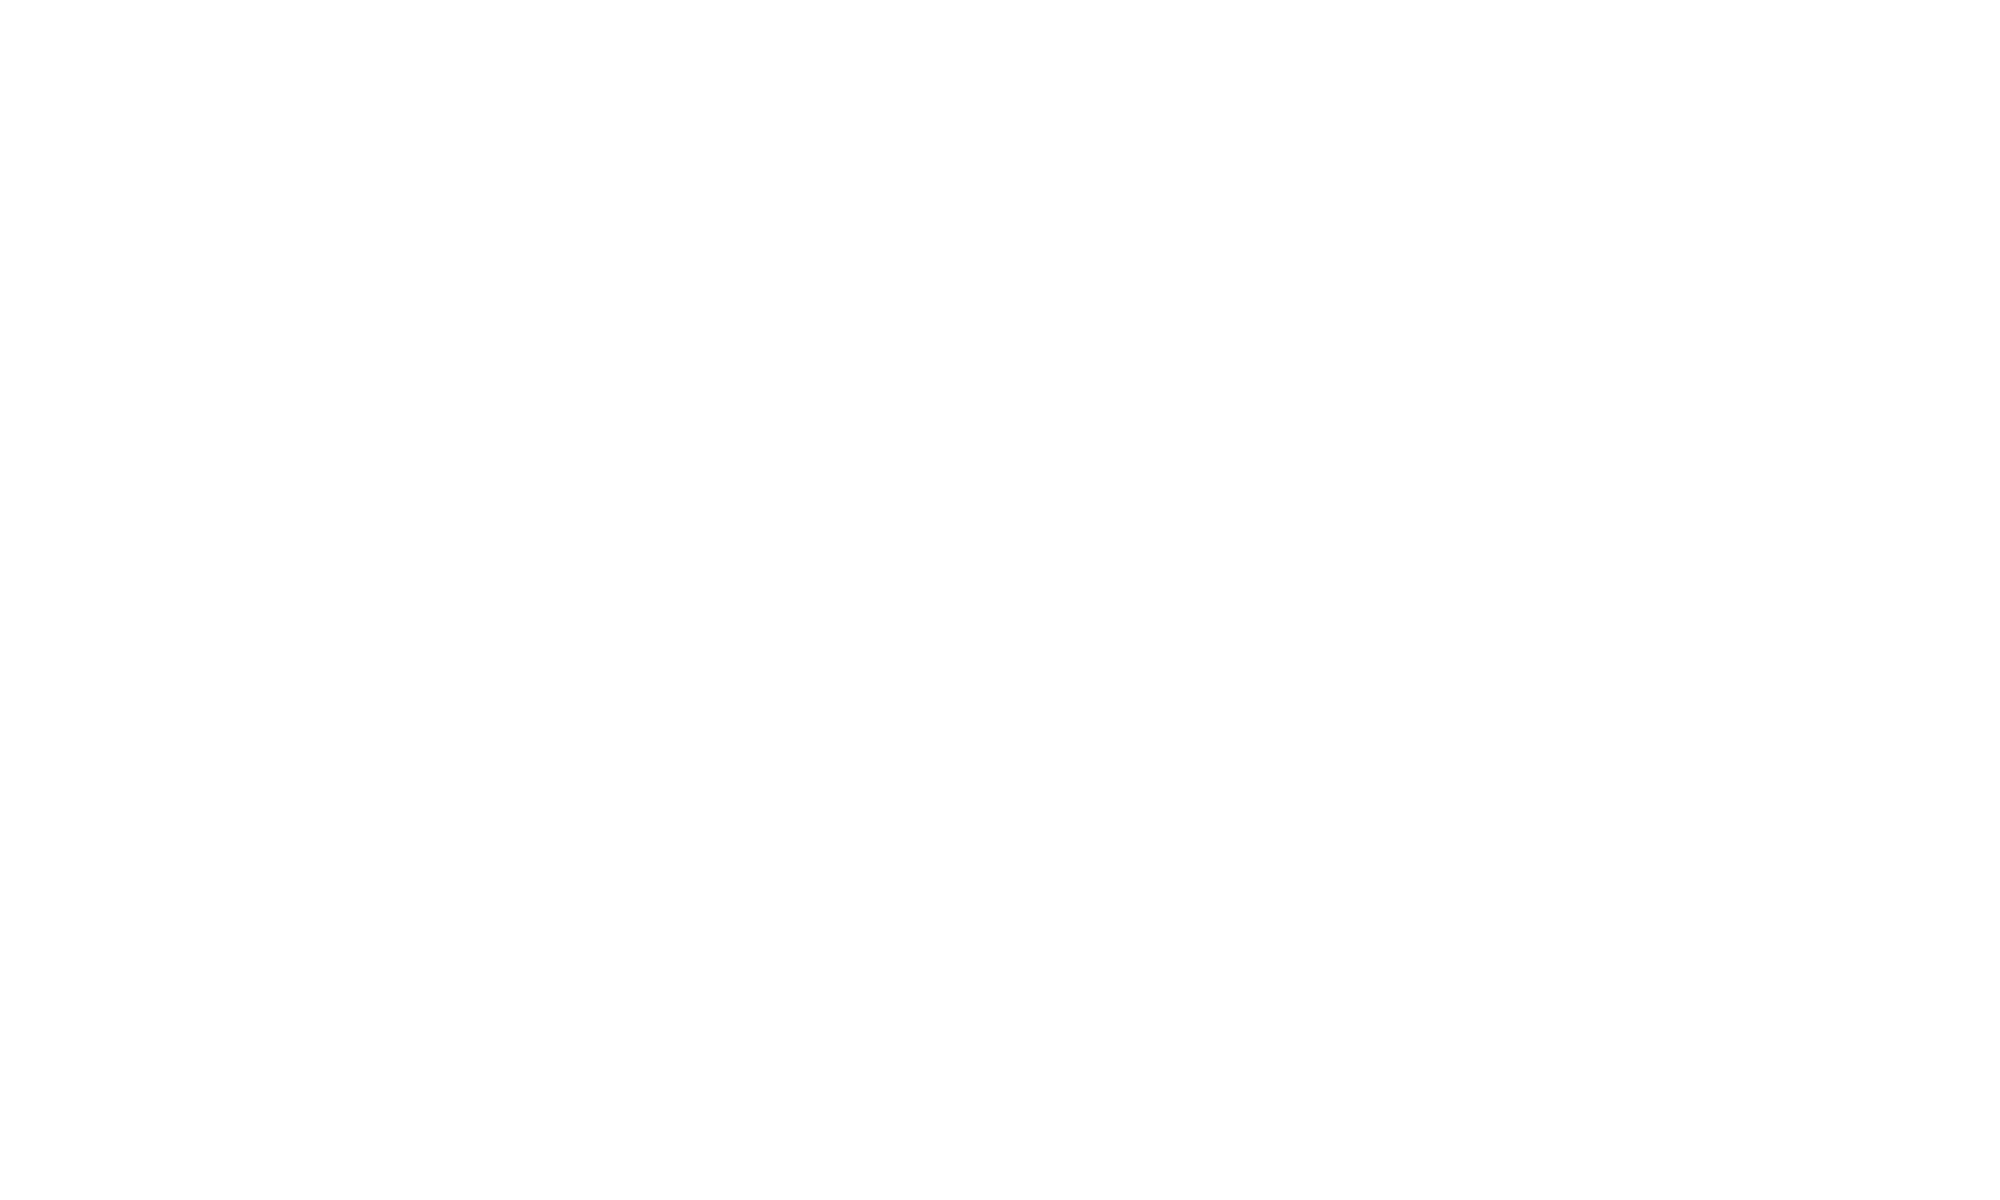

NameError: name 'error_ti_trunc' is not defined

In [116]:
from matplotlib import ticker, cm, colors

rc('font',**{'family':'serif','serif':['Palatino'], 'size':16})
             
fig = plt.figure(figsize=(10,6))
lev_exp = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,14],dtype=np.float64)
levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

# cp = plt.contourf(100*Tr/ro.real,100*TE/E.real,error_ti[0], levels=16,locator=ticker.LogLocator(10),norm=colors.LogNorm(vmax = 1e1), cmap=cm.jet)
# cp = plt.contourf(100*Tr/ro.real,100*TE/E.real,error_ti[0], levs,antialiased=True, norm=colors.LogNorm(vmax = 1e1), cmap=cm.jet)
# cbar = fig.colorbar(cp)

for kk in range(len(orders_ti)):
    CS=plt.contour(100*Tx/x.real,100*Ty/y.real,error_ti_trunc[-1-kk], [1e-5], colors = 'C'+str(kk))
    
#     plt.clabel(CS,fmt='Order '+str(orders_ti[kk]), inline=1, fontsize=12, colors='k')
#     print(CS.collections[0])
#     plt.clabel(CS,fmt='Ord. '+str(orders_ti[-1-kk]), inline=1, fontsize=8, colors='k')
    
    CS.collections[0].set_label('Order '+str(orders_ti[-1-kk]))

# cbar.ax.set_ylabel("Relative error of \n$\\left.\\mathbf{u}(r_o+\\Delta r_o, E+\\Delta E)\\right|_{r_i}$")
plt.xlabel("$\\displaystyle{\\frac{\Delta x}{x}} [ \% ]$")
plt.ylabel("$\\displaystyle{\\frac{\Delta y}{y}} [ \% ]$")


ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(10))
plt.grid(which='major',color='#CCCCCC', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor',color='#EEEEEE')

plt.axis([-100,160,-100,100])
plt.legend()
plt.tight_layout()
plt.savefig('error_ti_logxy_trunc_orders.pdf',dpi=150)
plt.show()

In [60]:
CS.cvalues[0]

0

In [ ]:
sym()